In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", palette="muted", color_codes=True)

## Read Dataset

In [2]:
customers_data = pd.read_csv(r'dataset/master/Customers.csv',encoding='cp1252')
exchange_rates_data = pd.read_csv(r'dataset/master/Exchange_Rates.csv',encoding='cp1252')
products_data = pd.read_csv(r'dataset/master/Products.csv',encoding='cp1252')
sales_data = pd.read_csv(r'dataset/master/Sales.csv',encoding='cp1252')
stores_data = pd.read_csv(r'dataset/master/Stores.csv',encoding='cp1252')

## Cleaning Dataset

### Customers Data

In [3]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
customers_data.isnull().any() # State Code

CustomerKey    False
Gender         False
Name           False
City           False
State Code      True
State          False
Zip Code       False
Country        False
Continent      False
Birthday       False
dtype: bool

In [5]:
customers_df = customers_data.copy()

In [6]:
customers_df = customers_df.astype({'CustomerKey':'str','Birthday':'datetime64[ns]'})

In [7]:
customers_df[customers_df.isnull().values] # Napoli is a city in Naples(NA),Italy

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,1981-04-18
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,1949-02-24
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,1936-03-14
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,1963-08-06
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1961-01-05
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,1976-08-28
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,1947-11-13
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1940-01-13
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,1977-05-08
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,2000-03-03


In [8]:
customers_df.loc[customers_df['State']=='Napoli', ['State Code','State']] = ['NA','Naples']

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  object        
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(9)
memory usage: 1.2+ MB


### Exchange Rates Data

In [10]:
exchange_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [11]:
exchange_rates_data.isnull().any() # No NA

Date        False
Currency    False
Exchange    False
dtype: bool

In [12]:
exchange_rates_df = exchange_rates_data.copy()

In [13]:
exchange_rates_df = exchange_rates_df.astype({'Date':'datetime64[ns]'})

### Products Data

In [14]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [15]:
products_data.isnull().any() # No NA

ProductKey        False
Product Name      False
Brand             False
Color             False
Unit Cost USD     False
Unit Price USD    False
SubcategoryKey    False
Subcategory       False
CategoryKey       False
Category          False
dtype: bool

In [16]:
products_df = products_data.copy()

In [17]:
products_df['Unit Cost USD'] = (
    products_df['Unit Cost USD']
    .str.replace("$", "")
    .str.replace(",", "")
    .str.strip()
    .astype(float)
)

In [18]:
products_df['Unit Price USD'] = (
    products_df['Unit Price USD']
    .str.replace("$", "")
    .str.replace(",", "")
    .str.strip()
    .astype(float)
)

In [19]:
products_df = products_df.astype({'ProductKey':'str',})

### Sales Data

In [20]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [21]:
sales_data.isnull().any() # Delivery Date has 80% N/A values so, not considering it.

Order Number     False
Line Item        False
Order Date       False
Delivery Date     True
CustomerKey      False
StoreKey         False
ProductKey       False
Quantity         False
Currency Code    False
dtype: bool

In [22]:
sales_df = sales_data.copy()

In [23]:
sales_df = sales_df.astype({'Order Number':'str',
                            'Order Date':'datetime64[ns]',
                            'Delivery Date':'datetime64[ns]',
                            'StoreKey':'str',
                            'ProductKey':'str',
                            'CustomerKey':'str'})

### Store Data

In [24]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [25]:
stores_data.isnull().any()

StoreKey         False
Country          False
State            False
Square Meters     True
Open Date        False
dtype: bool

In [26]:
stores_df = stores_data.copy()

In [27]:
stores_df = stores_df.astype({'StoreKey':'str','Open Date':'datetime64[ns]'})

In [28]:
stores_df[stores_df.isnull().values]

,StoreKey,Country,State,Square Meters,Open Date
66,0,Online,Online,NaN,2010-01-01


In [29]:
stores_df.loc[stores_df['State']=='Online', 'Square Meters'] = 0 

### Check

In [30]:
datasets = [customers_df, exchange_rates_df, products_df, sales_df, stores_df]
for df in datasets:
    col_has_na = df.isnull().any()
    if True in col_has_na.values:
        print(col_has_na[col_has_na.values])


Delivery Date    True
dtype: bool


## Joining Dataset

In [31]:
# sales_df will be our primary df

In [32]:
print(customers_df.CustomerKey.is_unique)
print(products_df.ProductKey.is_unique)
print(sales_df['Order Number'].is_unique)
print(stores_df.StoreKey.is_unique)

True
True
False
True


In [33]:
len(sales_df['Order Number'].unique())

26326

In [34]:
master_df = sales_df.merge(products_df,on='ProductKey',how='left')
master_df = master_df.merge(stores_df,on='StoreKey',how='left')
master_df = master_df.merge(customers_df,on='CustomerKey',how='left',suffixes=['_Store','_Customer'])

In [35]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Number      62884 non-null  object        
 1   Line Item         62884 non-null  int64         
 2   Order Date        62884 non-null  datetime64[ns]
 3   Delivery Date     13165 non-null  datetime64[ns]
 4   CustomerKey       62884 non-null  object        
 5   StoreKey          62884 non-null  object        
 6   ProductKey        62884 non-null  object        
 7   Quantity          62884 non-null  int64         
 8   Currency Code     62884 non-null  object        
 9   Product Name      62884 non-null  object        
 10  Brand             62884 non-null  object        
 11  Color             62884 non-null  object        
 12  Unit Cost USD     62884 non-null  float64       
 13  Unit Price USD    62884 non-null  float64       
 14  SubcategoryKey    6288

### Finding Age as on Order Date

In [36]:
master_df['Age'] = master_df['Order Date'] - master_df['Birthday']

In [37]:
master_df['Age'] = master_df['Age'].dt.components.days/365.25

In [38]:
master_df['Age'] = master_df['Age'].astype(int)

### Days taken to Delivery (Online Only)

In [39]:
master_df['Days_Taken'] = master_df['Delivery Date'] - master_df['Order Date']

In [40]:
master_df.Days_Taken = master_df.Days_Taken.dt.components.days.fillna(0)

In [41]:
master_df['Delivery Date'] = master_df['Order Date'] + pd.to_timedelta(master_df.Days_Taken,unit="days")

### Total Cost & Price

In [42]:
master_df['Total Cost USD'] = master_df['Unit Cost USD'] * master_df['Quantity']

In [43]:
master_df['Total Price USD'] = master_df['Unit Price USD'] * master_df['Quantity']

## EDA

### 1. Avg Customer Age

In [44]:
master_df.groupby(['CustomerKey'])['Age'].mean().mean()

49.591116033852906

In [45]:
# Age Bin
len(master_df[(master_df.Age>=30)&(master_df.Age<40)].CustomerKey.unique())

2019

### 2. Avg Order

In [46]:
len(master_df['Order Number'].unique())/len(master_df.CustomerKey.unique())

2.214688314965929

### 3. Online sales

In [47]:
master_df[master_df['StoreKey']=='0']['Total Price USD'].sum()

11404324.629999999

### 4. Avg Store Area

In [48]:
master_df.groupby(['StoreKey'])['Square Meters'].max().mean()

1375.6896551724137

### 5. Avg Delivery Time taken

In [49]:
master_df[master_df.Days_Taken>0].Days_Taken.mean()

4.529130269654386

### 6. Total Revenue

In [50]:
master_df['Total Price USD'].sum()

55755479.589999996

### 7. Total Profit

In [51]:
master_df['Total Price USD'].sum() - master_df['Total Cost USD'].sum()

32662688.38

### 8. Product Popularity

In [52]:
master_df.groupby(['Product Name'])['Quantity'].sum().nlargest(1)

Product Name
WWI Desktop PC2.33 X2330 Black    550
Name: Quantity, dtype: int64

In [53]:
master_df.groupby(['Product Name'])['Quantity'].sum().nsmallest(1)

Product Name
Adventure Works Chandelier M8150 Black    1
Name: Quantity, dtype: int64

### 9. Top Brand

In [54]:
# By Quantity
master_df.groupby(['Brand'])['Quantity'].sum().nlargest(1)

Brand
Contoso    49827
Name: Quantity, dtype: int64

In [55]:
# By Revenue
master_df.groupby(['Brand'])['Total Price USD'].sum().nlargest(1)

Brand
Adventure Works    11849909.32
Name: Total Price USD, dtype: float64

### 10. Top Performing Stores by Revenue

In [56]:
master_df.groupby(['StoreKey','Country_Store', 'State_Store'])['Total Price USD'].sum().nlargest(3)

StoreKey  Country_Store  State_Store
0         Online         Online         11404324.63
55        United States  Nevada          1417885.41
50        United States  Kansas          1394738.06
Name: Total Price USD, dtype: float64

## Visualisation

### 1. Age Distribution of Customers

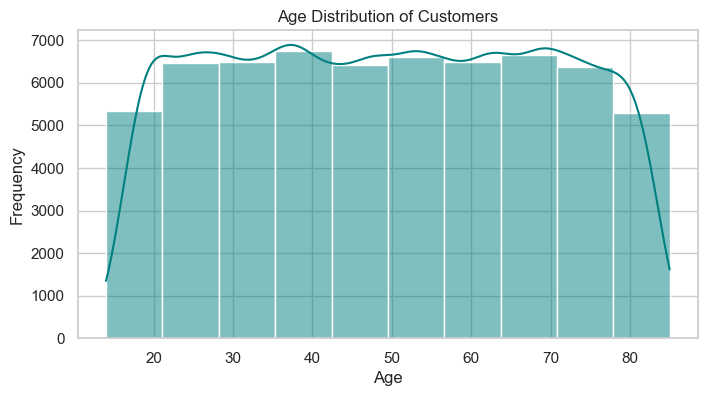

In [91]:
plt.figure(figsize=(8, 4))
sns.histplot(master_df['Age'], bins=10, kde=True, color='teal')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('visuals/Age Distribution of Customers.png',bbox_inches='tight')
plt.show()
plt.close()

### 2. Sales Trend Over Time

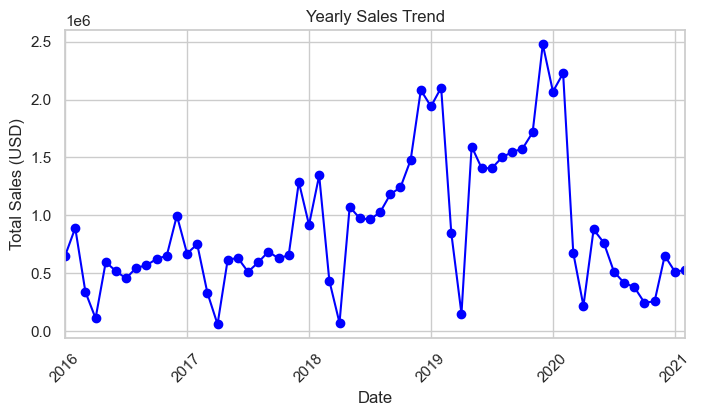

In [92]:
sales_trend = master_df.groupby(master_df['Order Date'].dt.to_period("M"))['Total Price USD'].sum()

plt.figure(figsize=(8, 4))
sales_trend.plot(kind='line', marker='o', color='Blue')
plt.title('Yearly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.savefig('visuals/Yearly Sales Trend.png',bbox_inches='tight')
plt.show()
plt.close()

### 3. Product Popularity (Top 5 Products)

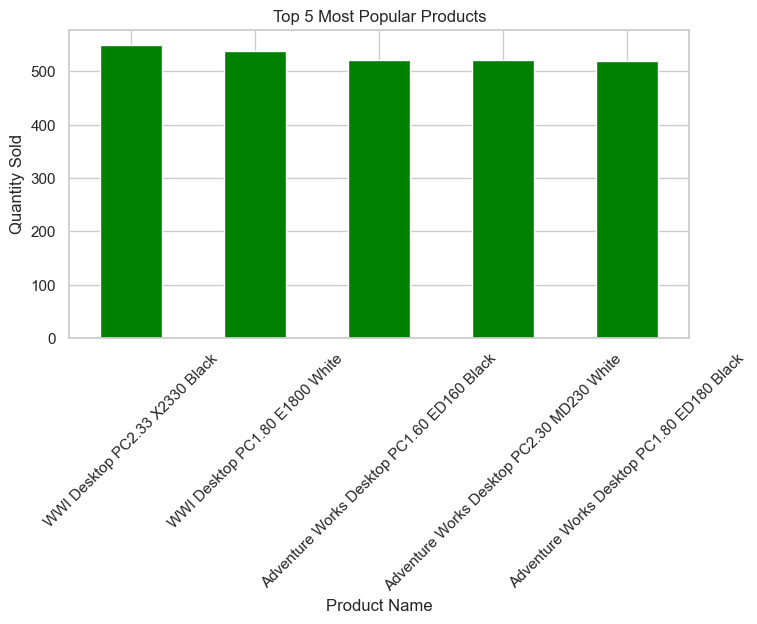

In [93]:
top_products = master_df.groupby('Product Name')['Quantity'].sum().nlargest(5)
plt.figure(figsize=(8, 4))
top_products.plot(kind='bar', color='green')
plt.title('Top 5 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.savefig('visuals/Popular Products.png',bbox_inches='tight')
plt.show()
plt.close()

### 4. Sales by Store

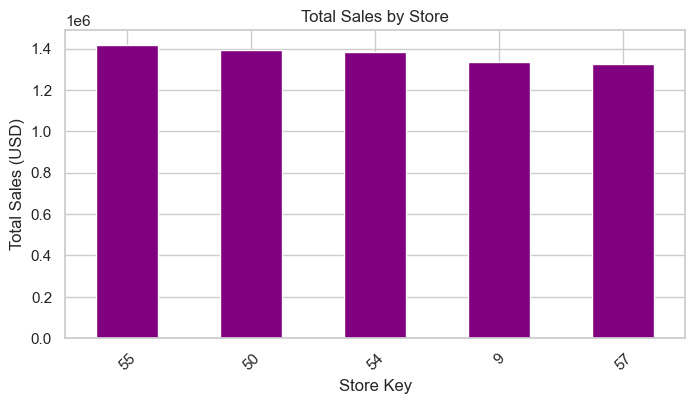

In [94]:
sales_by_store = master_df[master_df.StoreKey!='0'].groupby('StoreKey')['Total Price USD'].sum().nlargest(5)

plt.figure(figsize=(8, 4))
sales_by_store.plot(kind='bar', color='purple')
plt.title('Total Sales by Store')
plt.xlabel('Store Key')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.savefig('visuals/Total Sales by Store.png',bbox_inches='tight')
plt.show()
plt.close()

### 5. Profit Margins by Product Category

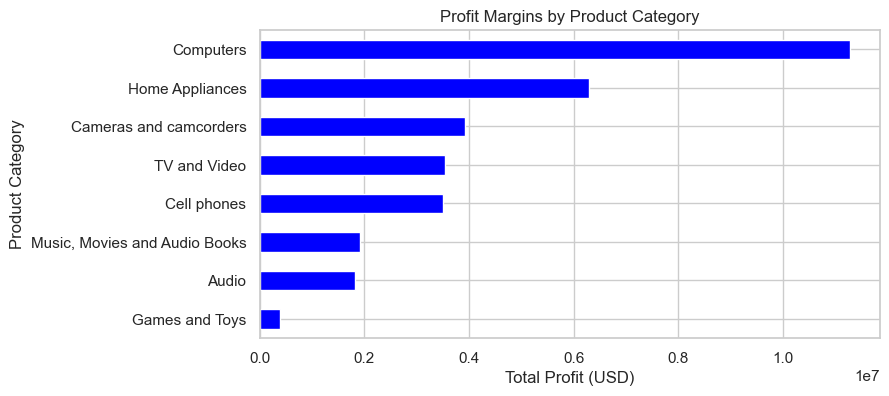

In [95]:
profit_margin = master_df.copy()
profit_margin['Profit'] = profit_margin['Total Price USD'] - master_df['Total Cost USD']
profit_by_category = profit_margin.groupby('Category')['Profit'].sum().sort_values()

plt.figure(figsize=(8, 4))
profit_by_category.plot(kind='barh', color='blue')
plt.title('Profit Margins by Product Category')
plt.xlabel('Total Profit (USD)')
plt.ylabel('Product Category')
plt.savefig('visuals/Profit Margins by Product Category.png',bbox_inches='tight')
plt.show()
plt.close()

### 6. Revenue by Continent

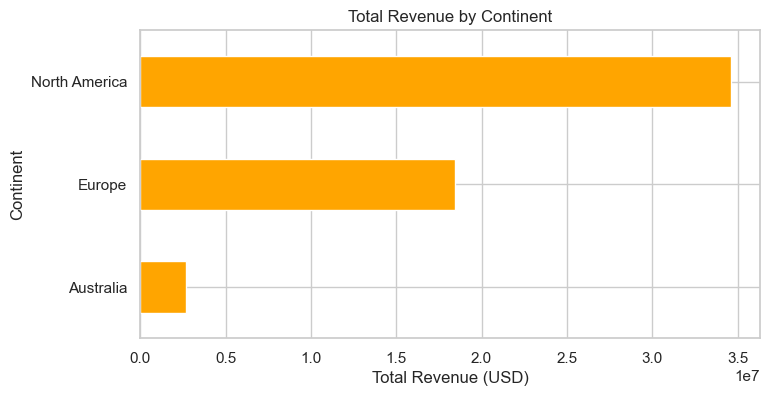

In [96]:
revenue_by_continent = master_df.groupby('Continent')['Total Price USD'].sum().sort_values()

plt.figure(figsize=(8, 4))
revenue_by_continent.plot(kind='barh', color='orange')
plt.title('Total Revenue by Continent')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Continent')
plt.savefig('visuals/Revenue by Continent.png',bbox_inches='tight')
plt.show()
plt.close()

## Store in SQL

In [ ]:
import mysql.connector

In [ ]:
mysql_server  = 'localhost'
mysql_user = 'root'
mysql_password = '1234567890'
mysql_database = 'dataspark_database'

connection = mysql.connector.connect(
    host= mysql_server,
    user= mysql_user,
    password= mysql_password
)

In [ ]:
connection.database = 'dataspark_database'

In [ ]:
cursor = connection.cursor()

In [ ]:
cursor.execute('DROP TABLE GE_Data;')

In [ ]:
create_query = '''CREATE TABLE IF NOT EXISTS GE_Data (
    id INT AUTO_INCREMENT PRIMARY KEY,
    OrderNumber VARCHAR(255) NOT NULL,
    LineItem INT NOT NULL,
    OrderDate DATE NOT NULL,
    DeliveryDate DATE NOT NULL,
    CustomerKey VARCHAR(255) NOT NULL,
    StoreKey VARCHAR(255) NOT NULL,
    ProductKey VARCHAR(255) NOT NULL,
    Quantity INT NOT NULL,
    CurrencyCode VARCHAR(10) NOT NULL,
    ProductName VARCHAR(255) NOT NULL,
    Brand VARCHAR(255) NOT NULL,
    Color VARCHAR(50) NOT NULL,
    UnitCostUSD DECIMAL(10, 2) NOT NULL,
    UnitPriceUSD DECIMAL(10, 2) NOT NULL,
    SubcategoryKey INT NOT NULL,
    Subcategory VARCHAR(255) NOT NULL,
    CategoryKey INT NOT NULL,
    Category VARCHAR(255) NOT NULL,
    Country_Store VARCHAR(255) NOT NULL,
    State_Store VARCHAR(255) NOT NULL,
    SquareMeters DECIMAL(10, 2) NOT NULL,
    OpenDate DATE NOT NULL,
    Gender VARCHAR(10) NOT NULL,
    Name VARCHAR(255) NOT NULL,
    City VARCHAR(255) NOT NULL,
    StateCode VARCHAR(50) NOT NULL,
    State_Customer VARCHAR(255) NOT NULL,
    ZipCode VARCHAR(20) NOT NULL,
    Country_Customer VARCHAR(255) NOT NULL,
    Continent VARCHAR(50) NOT NULL,
    Birthday DATE NOT NULL,
    Age INT NOT NULL,
    Days_Taken INT,
    TotalCostUSD DECIMAL(10, 2) NOT NULL,
    TotalPriceUSD DECIMAL(10, 2) NOT NULL
);'''

In [ ]:
cursor.execute(create_query)

In [ ]:
INSERT_QUERY = """
INSERT INTO GE_Data (
    OrderNumber, LineItem, OrderDate, DeliveryDate, CustomerKey, StoreKey, ProductKey, Quantity, 
    CurrencyCode, ProductName, Brand, Color, UnitCostUSD, UnitPriceUSD, SubcategoryKey, Subcategory, 
    CategoryKey, Category, Country_Store, State_Store, SquareMeters, OpenDate, Gender, Name, City, 
    StateCode, State_Customer, ZipCode, Country_Customer, Continent, Birthday, Age, Days_Taken,
    TotalCostUSD, TotalPriceUSD
) VALUES (
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, 
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
)
"""

In [ ]:
for i, row in master_df.iterrows():
    cursor.execute(INSERT_QUERY, tuple(row))

In [ ]:
connection.commit()

In [ ]:
connection.close()